# PR 6: Explainable AI and visualization webapp for eHealth

# Group 102-Seminar goals:
In this project we will develop and apply XAI (Explainable AI) for a ehealth Machine Learning use case. In particular, we will support the digestive department of a Hospital with a webapp based on Streamlit with the following functionalities:

- Execution of a binary classification for a new hospital patient to predict the propensity to develop a digestive illness
- Store a new hospital case's data record in the original csv file 
- Local interpretability and explainability of the prediction for any hospital case
- Global interpretability and explainability of the supervised model

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering, model training and prediction, and finally, data visualization in order to identify potential patients that could develop the digestive illness. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the XGBoost or Random Forest Model. Analysis of metrics (recall, precision, confusion metrics)
3. Build a webapp based on Streamlit as a user interface for doctors to 1) add new use cases to the original csv file, 2) execute the Machine Learning model and 3) visualize and interpret how the Machine Learning model works from a local and global perspectives 

Recall the Analytics workflow we learned that is fully recommended to follow in any Data Science project:

<img src="analytics_workflow.png" width="750" align="center" title="Figure 1">

<center> Figure 1</center> 


**What do you have to deliver? A .zip file with:**

- **Notebook**: This Jupyter completed with your code
- **webapp**: All the Python files of your webapp for the Hospital use. Your code should follow the following structure: 1) an **app.py** with the main file and 2) **pages** directories with the different sections of your webapp 
- **Report**: A 2-pages PDF where the answers to all exercises of this Notebook that are identified as **[REPORT]**

### Due date: up to November, 21st, 23:55h. 
### Submission procedure: via Moodle.

# Context:  Using Machine Learning for eHealth

We work as a data scientist in a Hospital.

During several years, doctors from the Digestive Department have recorded several patient cases that suffered a specific illness and their evolution. Some patients needed to be attended by the ICU (Intensive Care Unit), a specific area in the hospital, because they required a special monitoring and attendance. 

The Digestive Department asked us for developing a webapp application **to store new patient case** and **to predict** if he/she is going to require to be attended by the ICU. Besides, this webapp should facilitate **the intepretation and explainability of the prediction for each new patient case**.


# Data gathering and understanding 
## Dataset

The dataset provided by the digestive department contains information from 62 patients' medical records. Some variables from this datataset are related to: 1) the characteristics of the patient (e.g. gender, age...), 2) habits (e.g. smoking, alcohol...), 3) previous illnesses and familiar tendencies (e.g. diabetes,...) , 4) other medications (e.g. antidepressant, ...). 
The target variable is **ICU** and takes **value 1 if the patient required ICU attendance** and **0 if he/she did not**.

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


## Imports

In [3]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split




from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)


## Read the data

In [4]:
data = pd.read_csv("stage_1_balanced.csv", sep=";")

# Dataset Exploratory Data Analysis (EDA)

[**EX1**] Analyze the main characteristics (type of variables, number of records, nulls, etc...) of the variables of the dataset and answer the following questions:
- Which are the types of the variables (integer, float, chart...)?
- Which is the the size (number of records) of the dataset and the file?
- Which are the variable with more nulls?
- Is there any categorical variable?
- Which is the ratio of every class (0: no ICU, 1: ICU) in the dataset?


type of variables= int64 and float 64

size = 108 entries

we have no variables with nulls as data is cleaned

we have no categorical variables in dataset

0 is 54, 1 is 54


In [5]:
data.info()
print(len(data[data['ICU']==0]))
print(len(data[data['ICU']==1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 65 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     108 non-null    int64  
 1   BMI                                            108 non-null    float64
 2   AGE                                            108 non-null    int64  
 3   ALCOHOL_UNITS_WEEK                             108 non-null    float64
 4   ALCOHOLCOM                                     108 non-null    float64
 5   ALCOHOLYEA                                     108 non-null    int64  
 6   YEARABSTIN                                     108 non-null    float64
 7   ASA                                            108 non-null    int64  
 8   BACTERIALI                                     108 non-null    int64  
 9   COLICBEFOR                                     108 non

In [6]:
display(data.head(10))

,Unnamed: 0,BMI,AGE,ALCOHOL_UNITS_WEEK,ALCOHOLCOM,ALCOHOLYEA,YEARABSTIN,ASA,BACTERIALI,COLICBEFOR,PREVIOUSPA,HTA,CARDIO,DIABETESAP,DIABETESNE,DYSLIPID,RESP_PREVIOUSDISEA,RENALCRONI,FAMILIARCA,FAMILIAR_A,GENEALTERA,HISTORY_CHOLECYSTECTOMY,HEREDPANCR,NUMBERPREV,PREVIOUS_A,PARASITINF,PCRONICAETIOLOGY,SEX,SMOKING,PACKYEAR,CIGARRETEP,SMOKINGYEA,STONESHIST,TRYGLICERI,VIRUSTYPE,ETIOLOGYFI,IPMN_global,ICU,ANTIARRITMICO,ANTIINFLAMATORIO,BETABLOQUEANTES,DIURETICO,IECA,ANTICOAGULANTE,ANTIPLAQUETARIO,ANTIDIABETICO,ESTATINA,BRONCODILATADORES,ANTIDEPRESIVOS,HOURSADMISSPAIN,APCRITER_A,CANCERHI_A_0,CANCERHI_A_Acute Myeloid Leukemia,CANCERHI_A_Bladder Cancer,CANCERHI_A_Breast Cancer,CANCERHI_A_Colorectal Cancer,"CANCERHI_A_Colorectal Cancer, Prostate Cancer",CANCERHI_A_Endometrial Cancer,CANCERHI_A_Gastric Cancer,CANCERHI_A_Haematological Cancer,CANCERHI_A_Kidney Cancer,CANCERHI_A_Lung Cancer,CANCERHI_A_Prostate Cancer,CANCERHI_A_Rectal Cancer,CANCERHI_A_Thyroid Cancer
0,0,25.95,72,0.00,0.0,0,0.0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,12,26.12,48,87.50,100.0,19,6.0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,7.6,0.4,19,0,0,0,2,0,1,1,0,0,0,1,0,0,1,1,0,0,168,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,51,26.98,68,0.00,0.0,0,0.0,3,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,100.0,2.0,50,1,0,0,7,0,1,0,1,0,1,0,0,1,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,65,26.12,72,0.00,0.0,0,0.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,24,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,73,27.92,68,0.00,0.0,0,0.0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0.0,0,1,0,0,6,0,1,0,1,0,0,1,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,79,24.13,83,29.75,34.0,30,0.0,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3.0,0.1,30,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,81,28.48,69,0.00,0.0,0,0.0,2,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,84,24.80,78,17.50,20.0,53,5.0,3,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,91,36.16,65,0.00,0.0,0,0.0,2,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,105,31.25,73,218.75,25.0,45,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,72,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


[**EX2**] Plot the distribution or histogram of `BMI`, `AGE` and `HOURSADMISSPAIN` variables using **seaborn** library. Which is the distribution of these 3 variables?

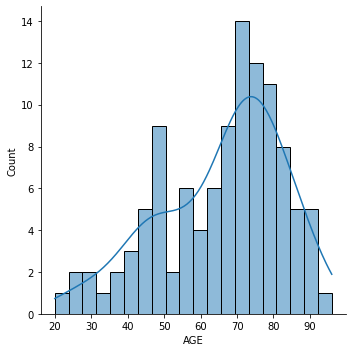

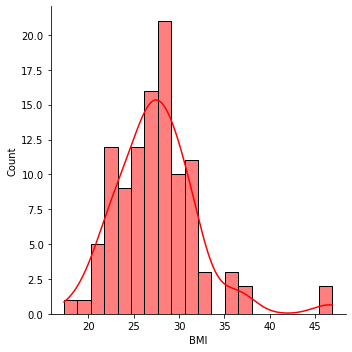

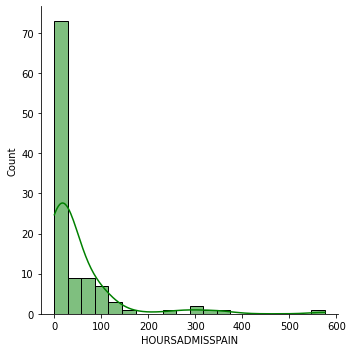

In [7]:
sns.displot(data['AGE'],kde=True,bins=20)
sns.displot(data['BMI'],color='red',kde=True,bins=20)
sns.displot(data['HOURSADMISSPAIN'],color='green',kde=True,bins=20)

[**EX3**] Split the data into a `male` (i.e. `SEX`01) and `female` (i.e. `SEX`=1) datasets. Use the **Seaborn** library to plot the previous 3 variables (i.e. `BMI`, `AGE` annd `HOURSADMINSPAIN` features), a histogram per class and one plot combining both classes' distributions (i.e. `male`vs `female`). 

- Which are the variables with most differentiated distributions in both datasets?
- Which features could be the most interesting to distinguish male vs female? Justify your answer?

AGE
BMI
HOURSADMISSPAIN


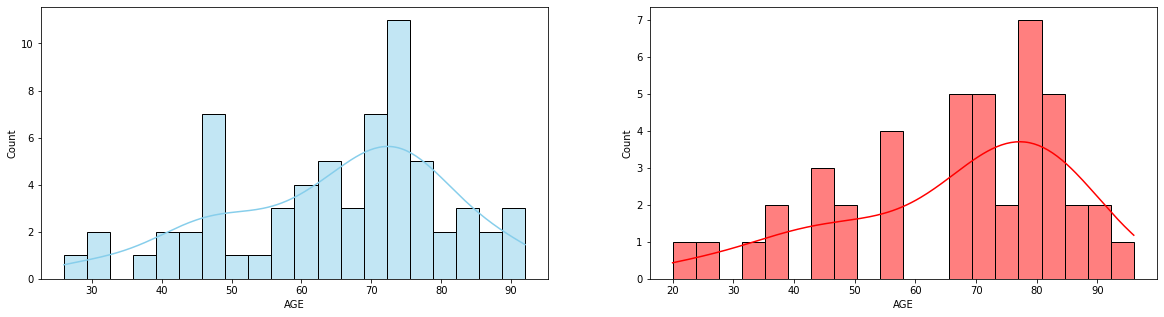

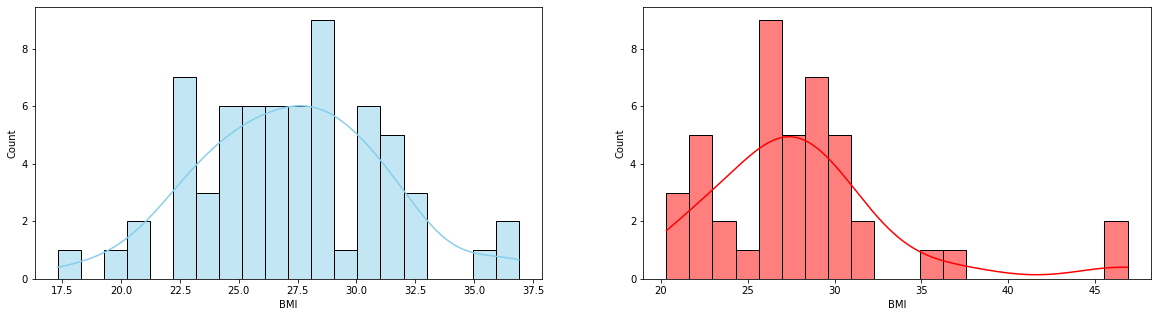

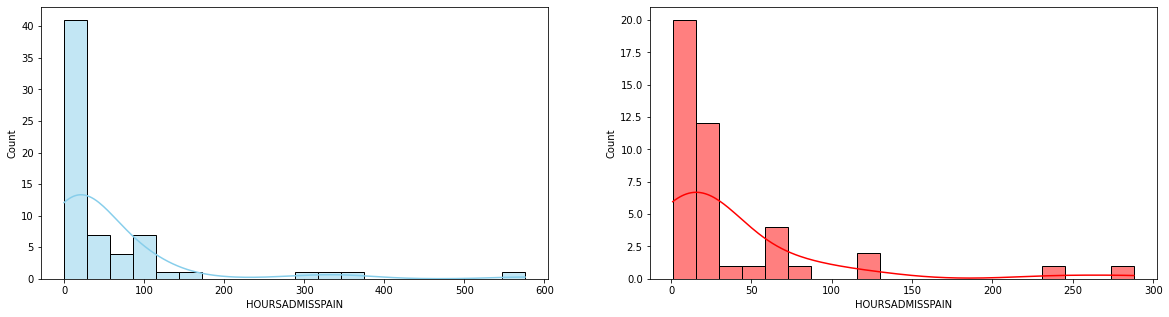

In [8]:
male = data[data['SEX']==0]
female= data[data['SEX']==1]
def draw(column):
    fig,axes = plt.subplots(1,2,figsize=(20,5))
    sns.histplot(male[column],kde=True,color='skyblue',ax=axes[0],bins=20)
    sns.histplot(female[column],kde=True,color='red',ax=axes[1],bins=20)
columns =['AGE','BMI','HOURSADMISSPAIN']

for col in columns:
  print(col)
  draw(col)

[**EX4**] Using **Matplotlib** or **Seaborn** libraries, draw a box plot for `BMI`, `AGE` and `HOURSADMISSPAIN` against male and female categories. Answer the following questions:
- Which variable presents more outliers?
- Which is Q1, Q2 (or median), Q3 for these variables of `female` registers?

AGE
BMI
HOURSADMISSPAIN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

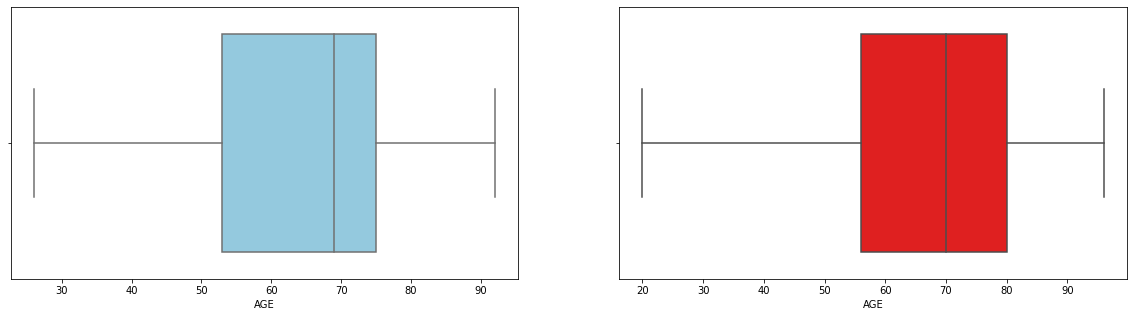

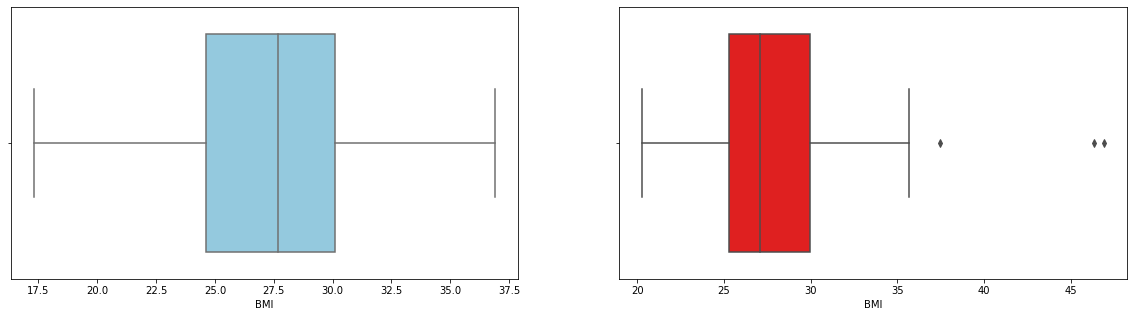

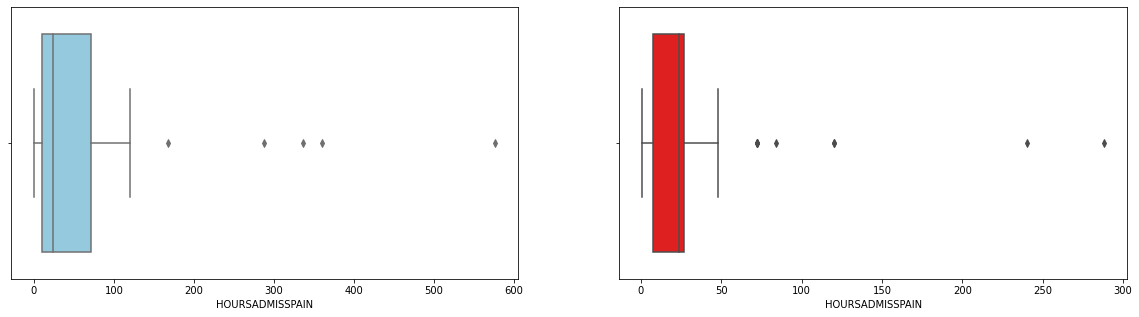

In [9]:
def draw_boxplot(column):
    fig,axes = plt.subplots(1,2,figsize=(20,5))
    sns.boxplot(male[column],color='skyblue',ax=axes[0])
    sns.boxplot(female[column],color='red',ax=axes[1])
columns =['AGE','BMI','HOURSADMISSPAIN']

for col in columns:
  print(col)
  draw_boxplot(col)

1. Variable "hoursadmisspain" presents more outliers
2. Female, AGE:
    
    Q1=57 

    Q2= 70

    Q3 = 80
  
  Female, BMI:

    Q1 = 26

    Q2 = 27

    Q3 =30

  Female, hoursadmisspain:

    Q1 = 10

    Q2 = 25

    Q3 = 30




     

[**EX5**] To understand the relationship between features, the matrix correlation is a key measure. Calculate and plot the correlation matrix for the original dataset with a **heatmap** and **correlation value** for each variable in the matrix

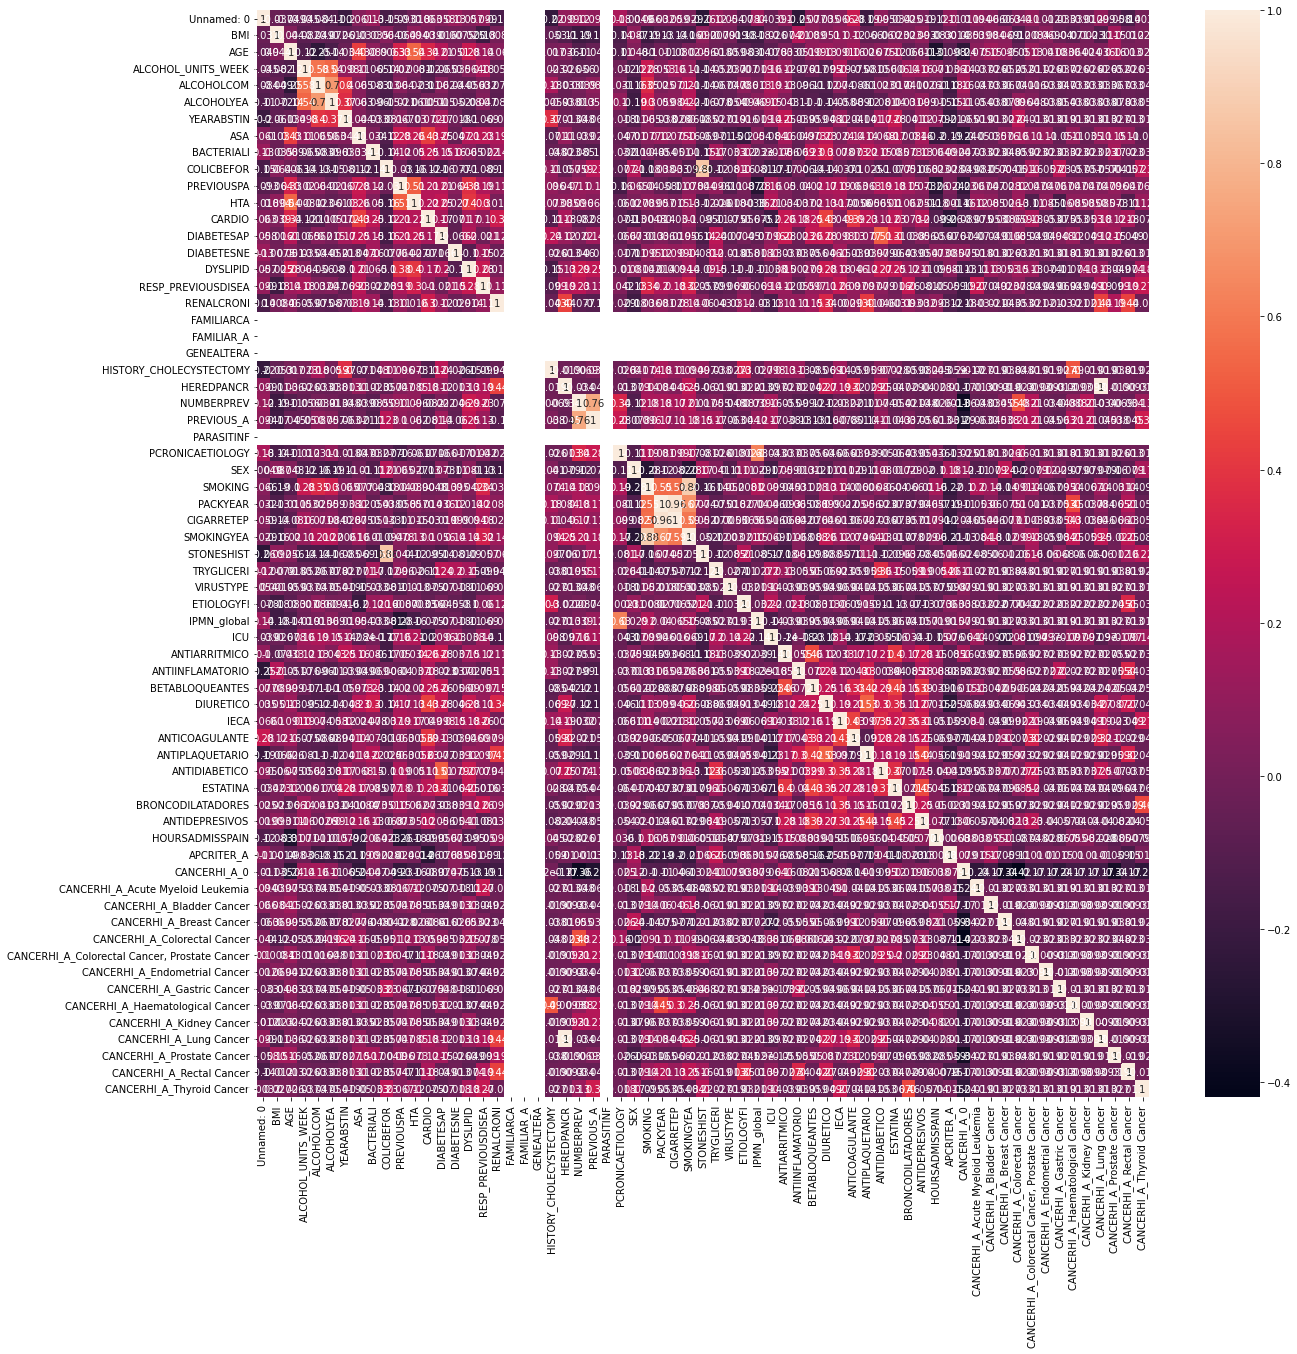

In [10]:
pyplot.figure(figsize=(20, 20))
data_corr= data.corr()

sns.heatmap(data_corr,annot=True)

# Modelling

In this section we will build our Machine Learning model to classify patients to be attended by **ICU** (i.e. `ICU`=1) vs not to be attended by **ICU** (i.e. `ICU`=0)

[**EX6**] Split randomly the dataset between train (80% of samples) and test (20% of samples) datasets and evaluate their size.

- How many positive cases (i.e. `ICU`=1) are in the test dataset?

**Tip**: It is recommended to remove the `Unnamed: 0`column 

In [10]:
data_dr=data.drop(columns= ["Unnamed: 0"],inplace=False)

data_train ,data_test = train_test_split(data_dr,test_size=0.2)
print(data_train.shape)
print(data_test.shape)
print(len(data_test[data_test['ICU']==1])) 

(86, 64)
(22, 64)
11


Now, we are ready to train and test the supervised learning model. Let's import the two libraries: XGBoost classifier and Random Forest classifier 

In [11]:
# Our algorithms:

from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

[**EX7**] Train a XGBoost classifier and evaluate:
- Confusion matrix
- Accuracy score
- Precision, Recall through the classification report
- Plot the density chart (i.e. histogram) of the probabilities of the prediction 

(86, 63)
Y_test:  [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
Y_pred:  [0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1]
[[7 4]
 [4 7]]
Accuracy: 63.64%
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.64      0.64      0.64        11

    accuracy                           0.64        22
   macro avg       0.64      0.64      0.64        22
weighted avg       0.64      0.64      0.64        22



<AxesSubplot:ylabel='Count'>

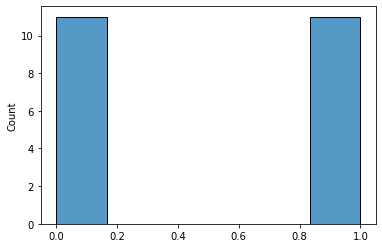

In [15]:

from sklearn.metrics._plot.confusion_matrix import confusion_matrix

model = XGBClassifier()
Y_train = data_train["ICU"]
X_train = data_train.drop(columns=["ICU"],inplace = False)
print(X_train.shape)
model.fit(X_train,Y_train )

Y_test= list(data_test["ICU"])
X_test = data_test.drop(columns = ["ICU"])

y_predict= model.predict(X_test)
predictions = [round(value) for value in y_predict]
print("Y_test: ", Y_test)
print("Y_pred: ", y_predict)
print(confusion_matrix(Y_test,y_predict))
accuracy=accuracy_score(Y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test,y_predict))
sns.histplot(y_predict)


[**EX8**] Repeat the **EX7** with the cut-off you consider the most appropiate for this use case. Evaluate the new performance. In particular:
- Confusion matrix
- Accuracy score
- Precision, Recall through the classification report

In [ ]:
#new_data = data.drop(columns=['BMI','YEARABSTIN',''])

[**EX9**] Save the model as a pickle file in order to be used in your webapp in the prediction section.

**Tip**: Use the following link to learn how to save models with Scikit-learn: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [30]:
!pip install XGBoost --version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pickle
filename= "my_model2.pkl"
pickle.dump(model,open(filename,"wb"))

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.

In [22]:
import xgboost as xgb
print(xgb.__version__)

0.90


# Explainability and interpretability of Machine Learning: SHAP Library

[**EX10**] As we have learnt interpreting and understanding how the Machine Learning models work is crucial in Artificial Intelligence. Visual Analytics is a skill that help us to explain the model we have just built. To do it: 
- firstly, import the **Shap library** and create the **Explainer** passing the model previously built
- secondly, calculate the shap_values object for the X_test dataset (20% from the total dataset)


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.0 MB/s 


In [2]:
print(xgboost._version_)

NameError: ignored

In [ ]:
import shap
explainer = shap.Explainer(model)

shap_value=explainer(X_test)

print(shap_value)


.values =
array([[-0.6234162 , -0.16606052, -0.03917413, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8224594 ,  0.20595887, -0.0446175 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29336455,  0.23355874, -0.05665478, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.49227455,  0.07021318, -0.042976  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40086797, -0.01906743, -0.0516887 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7341625 ,  0.38004866, -0.04863722, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

.base_values =
array([-0.04592974, -0.04592974, -0.04592974, -0.04592974, -0.04592974,
       -0.04592974, -0.04592974, -0.04592974, -0.04592974, -0.04592974,
       -0.04592974, -0.04592974, -0.04592974, -0.04592974, -0.04592974,
       -0.04592974, -0.04592974, -0.04592974, -0.04592974, -0.04592974,
       -0.04592974, -0.04592974], dtype=float32)

.data =


[**EX11**] Identify the shap_values object's arrays. In particular, print: 
- .values: i.e. shapley values for each feature and sample from X_test
- .data: i.e. every sample from X_test 
- .base_values: i.e. the average of the predictions for all X_test

[**EX12**] How is the shap_values object for the **index=0**?

In [ ]:
print(shap_value[0])

.values =
array([-0.6234162 , -0.16606052, -0.03917413, -0.04645461,  0.        ,
        0.        ,  0.01669927,  0.        ,  0.02704634,  0.11166494,
       -0.24633774,  0.01765897, -0.02279011,  0.        , -0.01432736,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.03631327,  0.        ,  0.        ,
        0.        ,  0.16946267,  0.        , -0.24211594, -0.19734104,
        0.        , -0.01828572,  0.        ,  0.        ,  1.6614022 ,
        0.        ,  0.0291233 ,  0.        ,  0.09100606,  0.07382527,
        0.        ,  0.        ,  0.08594327,  0.00550594,  0.11845461,
        0.        ,  0.        ,  0.3980174 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

.base_values =
-0.04592974

.data =
array([22.73, 40.  , 17.5 ,

[**EX13**] [**REPORT**] For sample with **index=0**, visualize the following plots using SHAP library:

1) waterfall

2) force_plot with link="logit" and without link="logit" parameter

3) decision_plot

In [ ]:
for col in data.columns:
  print(col,max(data[col]))

Unnamed: 0 584
BMI 46.88
AGE 96
ALCOHOL_UNITS_WEEK 350.0
ALCOHOLCOM 130.0
ALCOHOLYEA 53
YEARABSTIN 6.0
ASA 3
BACTERIALI 1
COLICBEFOR 1
PREVIOUSPA 1
HTA 1
CARDIO 1
DIABETESAP 2
DIABETESNE 2
DYSLIPID 1
RESP_PREVIOUSDISEA 1
RENALCRONI 1
FAMILIARCA 0
FAMILIAR_A 0
GENEALTERA 0
HISTORY_CHOLECYSTECTOMY 1
HEREDPANCR 1
NUMBERPREV 5
PREVIOUS_A 1
PARASITINF 0
PCRONICAETIOLOGY 2
SEX 1
SMOKING 1
PACKYEAR 300.0
CIGARRETEP 10.0
SMOKINGYEA 55
STONESHIST 1
TRYGLICERI 1
VIRUSTYPE 1
ETIOLOGYFI 9
IPMN_global 1
ICU 1
ANTIARRITMICO 1
ANTIINFLAMATORIO 1
BETABLOQUEANTES 1
DIURETICO 1
IECA 1
ANTICOAGULANTE 1
ANTIPLAQUETARIO 1
ANTIDIABETICO 1
ESTATINA 1
BRONCODILATADORES 1
ANTIDEPRESIVOS 1
HOURSADMISSPAIN 576
APCRITER_A 4
CANCERHI_A_0 1
CANCERHI_A_Acute Myeloid Leukemia 1
CANCERHI_A_Bladder Cancer 1
CANCERHI_A_Breast Cancer 1
CANCERHI_A_Colorectal Cancer 1
CANCERHI_A_Colorectal Cancer, Prostate Cancer 1
CANCERHI_A_Endometrial Cancer 1
CANCERHI_A_Gastric Cancer 1
CANCERHI_A_Haematological Cancer 1
CANCERHI_A_Kid

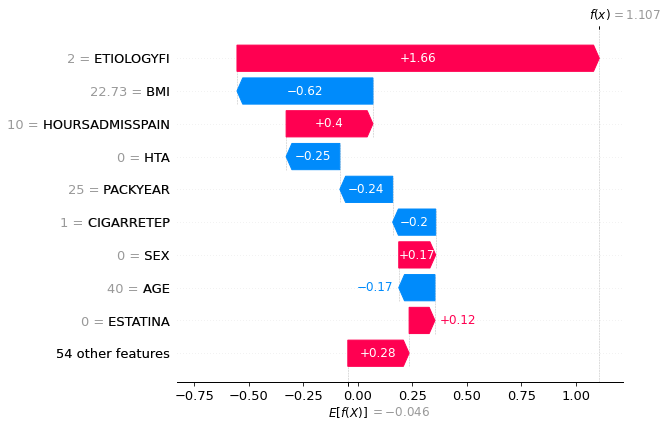

In [ ]:

shap.plots.waterfall(shap_value[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_value[0],link="logit")

In [ ]:
shap.initjs()
shap.plots.force(shap_value[0])

In [ ]:


select = range(10)
features = X_test.iloc[select]
#features_display= X_display.loc[features.index]
expected=explainer.expected_value
print(expected)
shap.decision_plot(expected,shap_value,X_test)

-0.04592974


TypeError: ignored

[**EX14**] [**REPORT**] For sample with **index=0**, which is the prediction of the classification model? Which is the real target value? Using the previous plot, interpret how the classification model works. Which is the top 5 most relevant variable in the prediction? Justify your answer. Justify your answer.

[**EX15**] [**REPORT**] Select another sample and repeat **EX13** and **EX14**

[**EX16**] [**REPORT**] Shap is a local and agnostic-model interpretability tool but it also can be used for global explaination. To get this global view of how the Machine Learning model works, build the following plots:
- plots.force for all shap values without link="logit"
- plots.force for all shap values with link="logit"

Analyze and describe one the plots.

In [ ]:
shap.initjs()
shap.plots.force(shap_value)

In [ ]:
shap.initjs()
shap.plots.force(shap_value,link="logit")

\\[**EX17**] [**REPORT**] Let's continue with global explanation. Use the **summary_plot** and **plots.bar** for all dataset (training+test samples):
- interpret how `AGE`, `SEX`, `BMI` and `NUMBERPREV` variables are contributing to the prediction.
- which top 5 variables are contributing more to the prediction vs the average prediction value

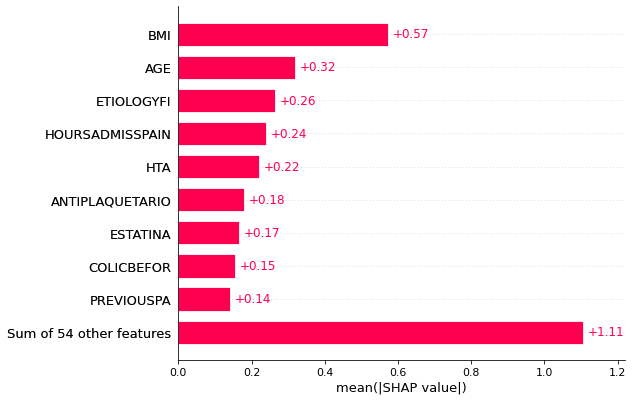

In [ ]:
shap.plots.bar(shap_value)

[**EX18**] [**REPORT**] Build the scatter plot of `BMI`using all shap_values. Which is the relationship between the range of `BMI`and its `SHAP value`? And what about `AGE`?

[**EX19**] [**WEBAPP**] Develop a webapp application with the following minimum features and structure:
- One page or section to add new patient cases to the original dataset
- One page or section to execute the Machine Learning prediction for both, i.e. a new patient case or one of the already patient of the dataset. In this section or page, it should also include the local interpretation of the prediction using SHAP
- One page or section with the global intepretation of the whole model